In [1]:
# packages

import pathlib
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import signal
from scipy.optimize import fsolve
from scipy.interpolate import interp2d
from sympy import symbols, Eq, solve, I, cos, exp, pi
from scipy.integrate import odeint

import os
os.chdir(os.path.abspath(''))

In [2]:
# data

m = 1
k = 61.7
rho = 1.225 # air density [kg/m3]
V0 = 2
c = 0.2
s=1
airfoil = pd.read_csv('FFA-W3-241.txt', delim_whitespace=True, header=None,names=['aoa','cl','cd','cm','fstat', 'Cl_inv','Cl_fs'])

omega_0 = np.sqrt(k/m)
damp = c / 0.5 * np.sqrt(k*m)  # are we sure???

t = np.linspace(0, 20, 2000)



In [3]:
# functions

def compute_differentials(z, t, k, m, rho, c, V0, s, airfoil):
    z1, z2 = z
    
    phi = np.arctan(z2 / V0)
    alpha = alpha_g + phi
    Cl = np.interp(np.rad2deg(alpha), airfoil['aoa'], airfoil['cl'])
    Vrel = np.sqrt(z2**2 + V0**2)
    Fx = 0.5 * rho * Vrel**2 * c * s * Cl * np.cos(phi)

    z1_diff = z2
    z2_diff = (-k * z1 - Fx) / m
    
    return [z1_diff, z2_diff]


def EoM():

    initial = [0.02, 0] # initial position and velocity
    z = odeint(compute_differentials, initial, t, args=(k, m, rho, c, V0, s, airfoil))
    return z




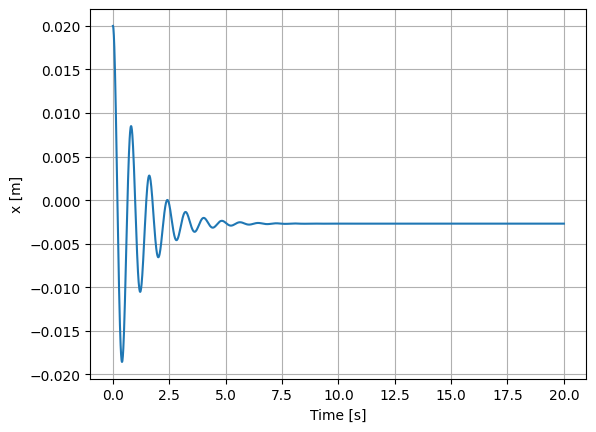

In [5]:
alpha_g = 0

z = EoM()

plt.figure(1)
plt.plot(t, z[:, 0])
plt.xlabel('Time [s]')
plt.ylabel('x [m]')
#plt.title('Damped Spring-Mass System Response')
plt.grid(True)
plt.show()

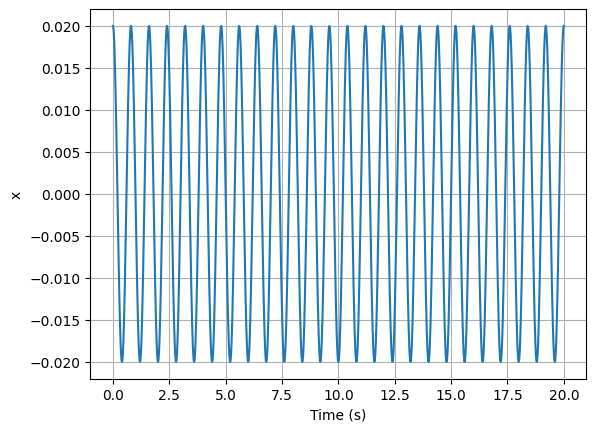

In [34]:
# does not work correctly

alpha_g = 20

z = EoM()

plt.figure(1)
plt.plot(t, z[:, 0])
plt.xlabel('Time (s)')
plt.ylabel('x')
#plt.title('Damped Spring-Mass System Response')
plt.grid(True)
plt.show()

In [ ]:
# dynamic stall still to implement

